In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '../data/Dartmouth Data Set- SIRS .xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

['Demographics',
 'ABC Data',
 'RSQ Data',
 'Medciation Review Data',
 'Diagnostic Data',
 'Presenting Problems',
 'Emergency Crisis Services',
 'living Situation change',
 'ED Use',
 'Law Enforcement',
 'In-patient admissions',
 'START Tool Dates',
 'Sheet12']

In [2]:
# Load the "ABC Data" sheet
abc_data = excel_data.parse('ABC Data')

# Display the first few rows of the ABC Data sheet
abc_data.head()

,Local ID,Date Reviewed,Type of Service,Irritability/Agitation,Lethargy/Social Withdrawal,Stereotypic Behavior,Hyperactivity/Noncompliance,Inappropriate Speech
0,11163106,2013-02-01 00:00:00,Intake,9.0,16.0,0.0,0.0,0.0
1,11163106,2013-02-01 00:00:00,Intake,9.0,16.0,0.0,0.0,0.0
2,11134102,2013-03-01 00:00:00,Intake,21.0,21.0,2.0,9.0,2.0
3,11134102,2013-03-01 00:00:00,Intake,21.0,21.0,2.0,9.0,2.0
4,11134102,2014-11-01 00:00:00,Re-evaluation,15.0,11.0,2.0,4.0,0.0


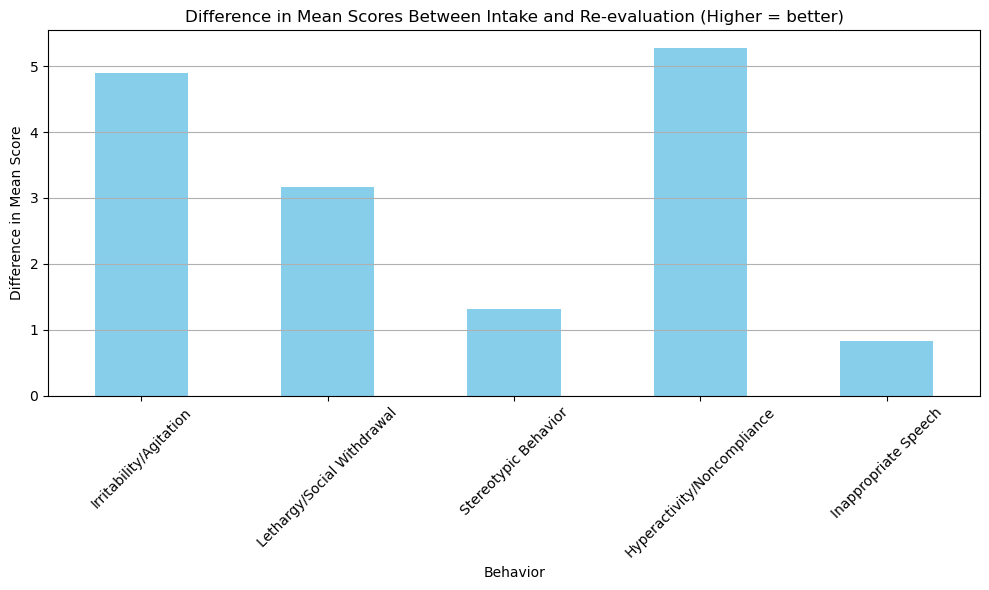

In [5]:
# Separate data into Intake and Re-evaluation
intake_data = abc_data[abc_data['Type of Service'] == 'Intake']
reevaluation_data = abc_data[abc_data['Type of Service'] == 'Re-evaluation']

# Calculate the mean scores for each behavior at Intake and Re-evaluation
intake_means = intake_data.mean(numeric_only=True)
reevaluation_means = reevaluation_data.mean(numeric_only=True)

# Combine the means into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Intake Mean': intake_means,
    'Re-evaluation Mean': reevaluation_means
})

# Calculate the difference between Intake and Re-evaluation
comparison_df['Difference'] = comparison_df['Intake Mean'] - comparison_df['Re-evaluation Mean']

# Plot the differences
plt.figure(figsize=(10, 6))
comparison_df['Difference'].plot(kind='bar', color='skyblue')
plt.title('Difference in Mean Scores Between Intake and Re-evaluation (Higher = better)')
plt.xlabel('Behavior')
plt.ylabel('Difference in Mean Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
# Convert the 'Date Reviewed' column to datetime, ignoring errors
abc_data['Date Reviewed'] = pd.to_datetime(abc_data['Date Reviewed'], errors='coerce')

# Drop rows with invalid or missing dates
cleaned_abc_data = abc_data.dropna(subset=['Date Reviewed'])

# Define the COVID-19 onset date
covid_onset_date = pd.Timestamp('2020-03-13')
testing_window_startdate = pd.Timestamp('2019-03-13')

# Separate data into before and after COVID-19
before_covid_data = cleaned_abc_data[(cleaned_abc_data['Date Reviewed'] < covid_onset_date) & (cleaned_abc_data['Date Reviewed'] > testing_window_startdate)]
# before_covid_data = cleaned_abc_data[cleaned_abc_data['Date Reviewed'] < covid_onset_date]

after_covid_data = cleaned_abc_data[cleaned_abc_data['Date Reviewed'] >= covid_onset_date]

# Further separate into Intake and Re-evaluation for both periods
before_covid_intake = before_covid_data[before_covid_data['Type of Service'] == 'Intake']
before_covid_reevaluation = before_covid_data[before_covid_data['Type of Service'] == 'Re-evaluation']

after_covid_intake = after_covid_data[after_covid_data['Type of Service'] == 'Intake']
after_covid_reevaluation = after_covid_data[after_covid_data['Type of Service'] == 'Re-evaluation']

# Calculate the mean scores for each behavior at Intake and Re-evaluation for both periods
before_covid_intake_means = before_covid_intake.mean(numeric_only=True)
before_covid_reevaluation_means = before_covid_reevaluation.mean(numeric_only=True)

after_covid_intake_means = after_covid_intake.mean(numeric_only=True)
after_covid_reevaluation_means = after_covid_reevaluation.mean(numeric_only=True)

# Combine the means into DataFrames for comparison
before_covid_comparison = pd.DataFrame({
    'Intake Mean (Before COVID)': before_covid_intake_means,
    'Re-evaluation Mean (Before COVID)': before_covid_reevaluation_means
})
before_covid_comparison['Difference (Before COVID)'] = before_covid_comparison['Intake Mean (Before COVID)'] - before_covid_comparison['Re-evaluation Mean (Before COVID)']

after_covid_comparison = pd.DataFrame({
    'Intake Mean (After COVID)': after_covid_intake_means,
    'Re-evaluation Mean (After COVID)': after_covid_reevaluation_means
})
after_covid_comparison['Difference (After COVID)'] = after_covid_comparison['Intake Mean (After COVID)'] - after_covid_comparison['Re-evaluation Mean (After COVID)']

# Combine the before and after COVID data into a single DataFrame for comparison
covid_comparison_df = pd.concat([before_covid_comparison, after_covid_comparison], axis=1)

covid_comparison_df


,Intake Mean (Before COVID),Re-evaluation Mean (Before COVID),Difference (Before COVID),Intake Mean (After COVID),Re-evaluation Mean (After COVID),Difference (After COVID)
Irritability/Agitation,21.418038,16.461551,4.956486,21.384530,16.612553,4.771977
Lethargy/Social Withdrawal,12.758987,9.539153,3.219834,12.399889,9.504249,2.895641
Stereotypic Behavior,5.148859,3.785405,1.363453,5.024336,3.830717,1.193620
Hyperactivity/Noncompliance,21.636825,16.237607,5.399218,20.919845,16.132767,4.787078
Inappropriate Speech,4.331430,3.452793,0.878637,4.199115,3.505878,0.693237


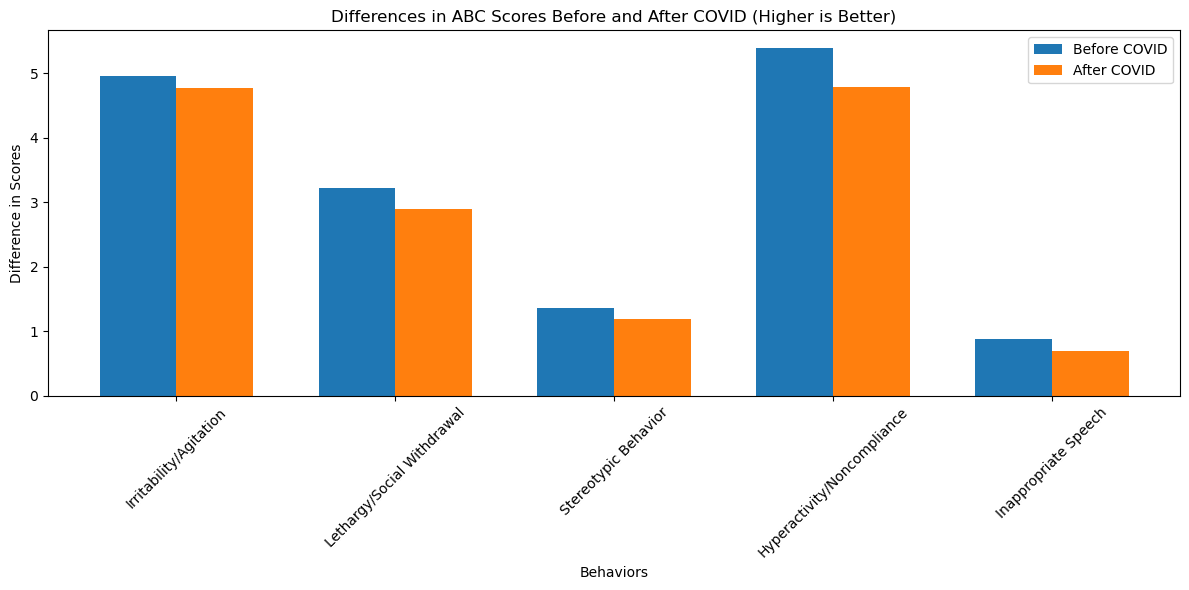

In [15]:

# Extract differences for before and after COVID
before_covid_diffs = before_covid_comparison['Difference (Before COVID)']
after_covid_diffs = after_covid_comparison['Difference (After COVID)']

# Define the behaviors
behaviors = before_covid_diffs.index

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(behaviors))

# Plot the differences
plt.bar(index, before_covid_diffs, bar_width, label='Before COVID')
plt.bar([i + bar_width for i in index], after_covid_diffs, bar_width, label='After COVID')

# Add labels and title
plt.xlabel('Behaviors')
plt.ylabel('Difference in Scores')
plt.title('Differences in ABC Scores Before and After COVID (Higher is Better)')
plt.xticks([i + bar_width / 2 for i in index], behaviors, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

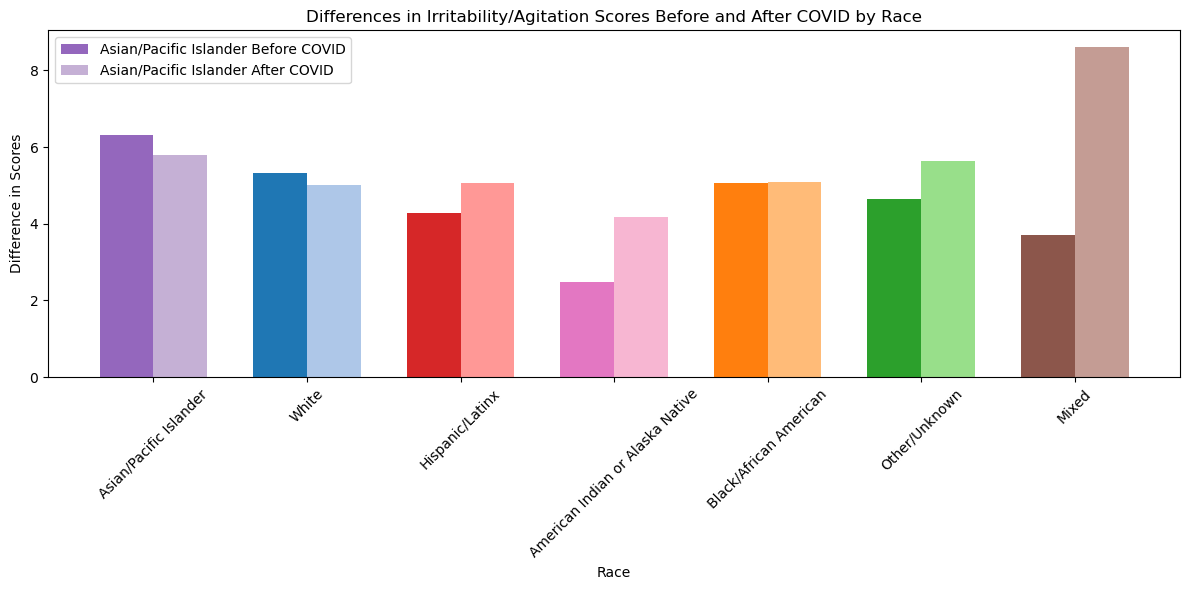

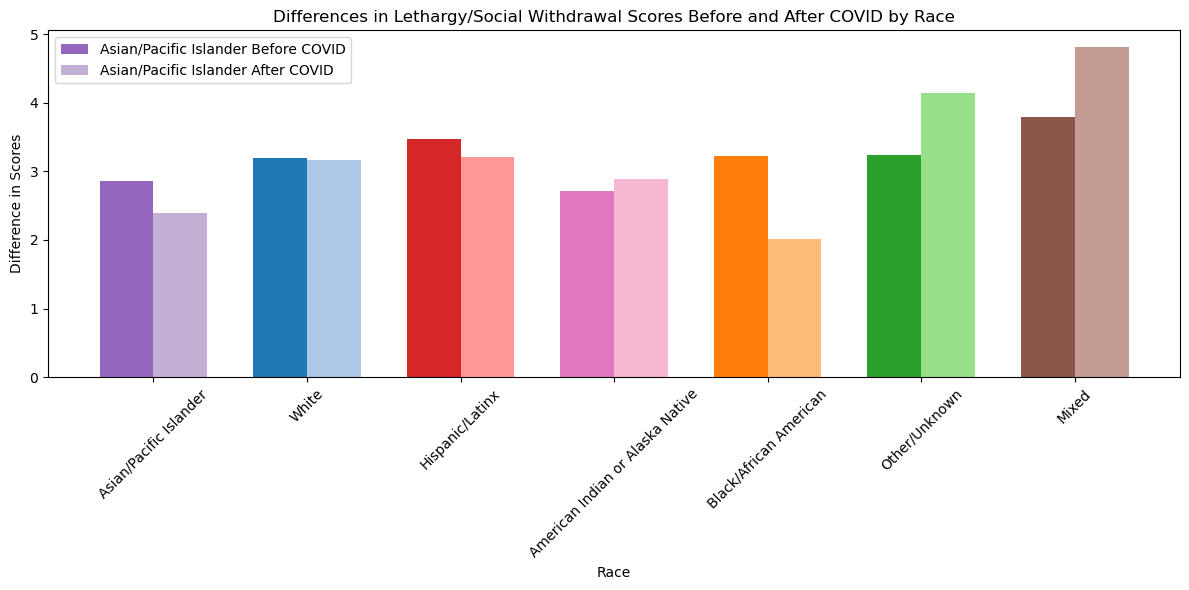

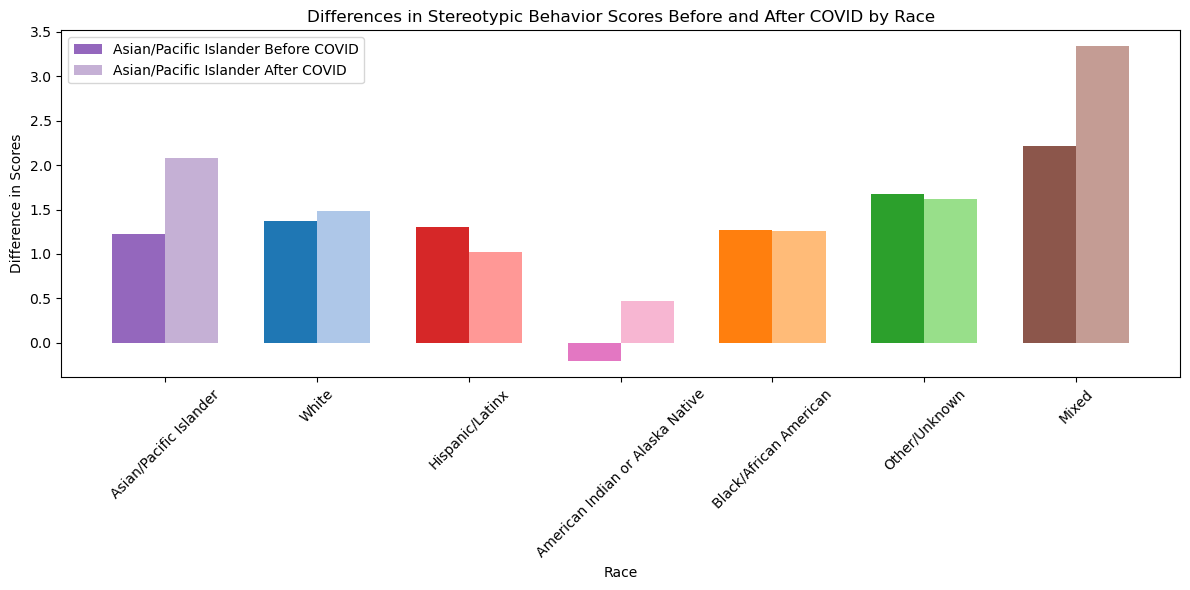

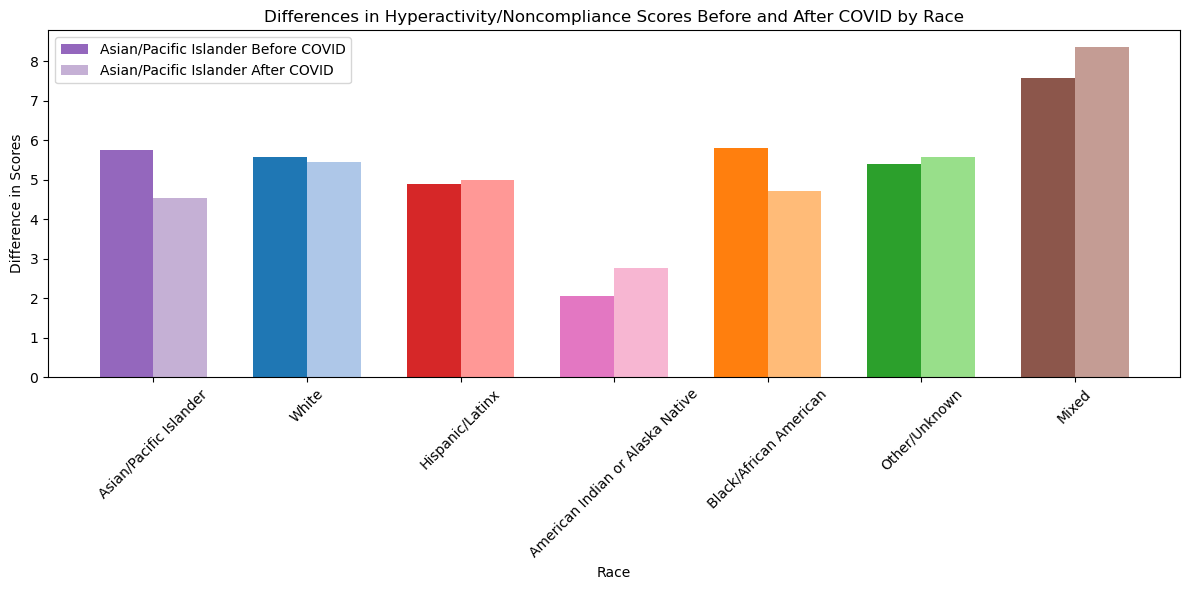

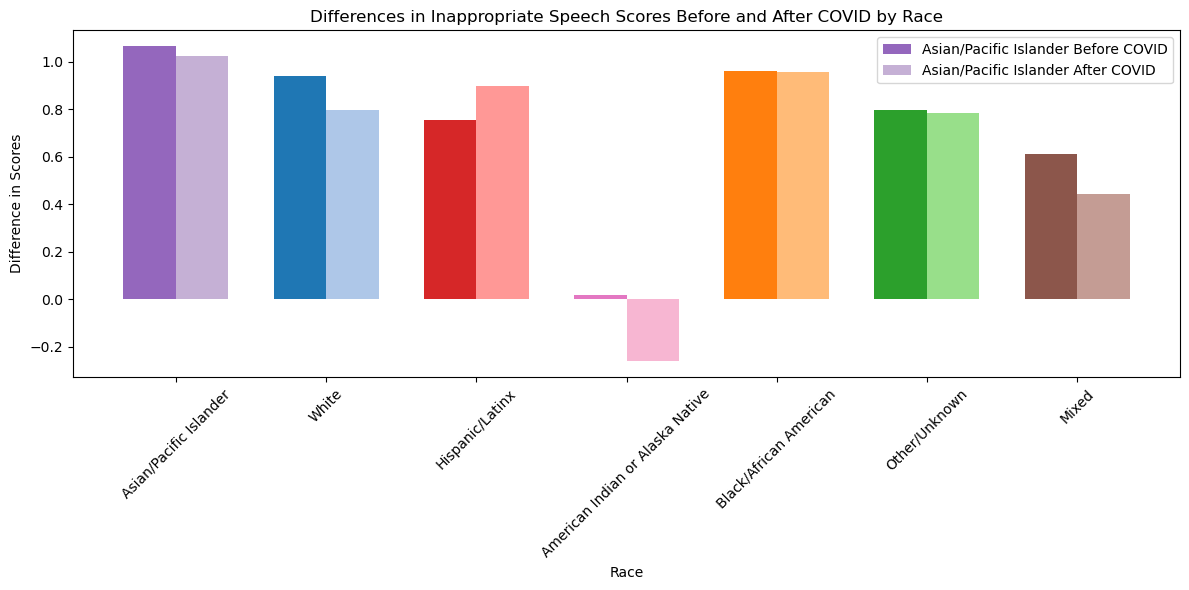

In [16]:


# Load the relevant sheets
demographics_df = pd.read_excel(file_path, sheet_name='Demographics')
abc_data = pd.read_excel(file_path, sheet_name='ABC Data')

# Standardize ID column names
demographics_df.rename(columns={'Local ID': 'Client_ID'}, inplace=True)
abc_data.rename(columns={'Local ID': 'Client_ID'}, inplace=True)

# Merge dataframes on 'Client_ID'
merged_df = demographics_df.merge(abc_data, on='Client_ID', how='inner')

# Categorize race
def categorize_race(race):
    categories = {
        'White': ['White', 'Other: Middle Eastern'],
        'Black/African American': ['Black or African American'],
        'Other/Unknown': ['Unknown, not collected', 'Other', 'Unknown, not collected, White', 'Other: Biracial'],
        'Hispanic/Latinx': ['Other: Hispanic', 'Other: Latino', 'Other: hispanic', 'Other: Mexican'],
        'Asian/Pacific Islander': ['Asian', 'Native Hawaiian or Other Pacific Islander'],
        'Mixed': ['Black or African American, White', 'Asian, White'],
        'American Indian or Alaska Native': ['American Indian or Alaska Native'],
    }

    for category, labels in categories.items():
        if race in labels:
            return category
    return 'Other/Unknown'

# Apply the function to categorize race
merged_df['race_clean'] = merged_df['Race'].apply(categorize_race)

# Convert 'Date Reviewed' column to datetime, ignoring errors
merged_df['Date Reviewed'] = pd.to_datetime(merged_df['Date Reviewed'], errors='coerce')

# Drop rows with invalid or missing dates
merged_df = merged_df.dropna(subset=['Date Reviewed'])

# Define the COVID-19 onset date
covid_onset_date = pd.Timestamp('2020-03-01')

# Function to analyze differences by race
def analyze_by_race(race):
    race_data = merged_df[merged_df['race_clean'] == race]
    
    # Separate data into before and after COVID-19
    before_covid_data = race_data[race_data['Date Reviewed'] < covid_onset_date]
    after_covid_data = race_data[race_data['Date Reviewed'] >= covid_onset_date]

    # Further separate into Intake and Re-evaluation for both periods
    before_covid_intake = before_covid_data[before_covid_data['Type of Service'] == 'Intake']
    before_covid_reevaluation = before_covid_data[before_covid_data['Type of Service'] == 'Re-evaluation']

    after_covid_intake = after_covid_data[after_covid_data['Type of Service'] == 'Intake']
    after_covid_reevaluation = after_covid_data[after_covid_data['Type of Service'] == 'Re-evaluation']

    # Calculate the mean scores for each behavior at Intake and Re-evaluation for both periods
    before_covid_intake_means = before_covid_intake.mean(numeric_only=True)
    before_covid_reevaluation_means = before_covid_reevaluation.mean(numeric_only=True)

    after_covid_intake_means = after_covid_intake.mean(numeric_only=True)
    after_covid_reevaluation_means = after_covid_reevaluation.mean(numeric_only=True)

    # Combine the means into DataFrames for comparison
    before_covid_comparison = pd.DataFrame({
        'Intake Mean (Before COVID)': before_covid_intake_means,
        'Re-evaluation Mean (Before COVID)': before_covid_reevaluation_means
    })
    before_covid_comparison['Difference (Before COVID)'] = before_covid_comparison['Intake Mean (Before COVID)'] - before_covid_comparison['Re-evaluation Mean (Before COVID)']

    after_covid_comparison = pd.DataFrame({
        'Intake Mean (After COVID)': after_covid_intake_means,
        'Re-evaluation Mean (After COVID)': after_covid_reevaluation_means
    })
    after_covid_comparison['Difference (After COVID)'] = after_covid_comparison['Intake Mean (After COVID)'] - after_covid_comparison['Re-evaluation Mean (After COVID)']

    # Combine the before and after COVID data into a single DataFrame for comparison
    covid_comparison_df = pd.concat([before_covid_comparison, after_covid_comparison], axis=1)

    return covid_comparison_df

# List of races to analyze
races = merged_df['race_clean'].unique()
behaviors = ['Irritability/Agitation', 'Lethargy/Social Withdrawal', 'Stereotypic Behavior', 'Hyperactivity/Noncompliance', 'Inappropriate Speech']

# Define color mapping for races
colors = {
    'White': ('#1f77b4', '#aec7e8'),
    'Black/African American': ('#ff7f0e', '#ffbb78'),
    'Other/Unknown': ('#2ca02c', '#98df8a'),
    'Hispanic/Latinx': ('#d62728', '#ff9896'),
    'Asian/Pacific Islander': ('#9467bd', '#c5b0d5'),
    'Mixed': ('#8c564b', '#c49c94'),
    'American Indian or Alaska Native': ('#e377c2', '#f7b6d2'),
}

# Plot differences by race for each behavior
for behavior in behaviors:
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(races))

    for i, race in enumerate(races):
        race_comparison_df = analyze_by_race(race)
        
        before_covid_diff = race_comparison_df.loc[behavior, 'Difference (Before COVID)']
        after_covid_diff = race_comparison_df.loc[behavior, 'Difference (After COVID)']
        
        plt.bar(i, before_covid_diff, bar_width, color=colors[race][0], label=f'{race} Before COVID' if i == 0 else "")
        plt.bar(i + bar_width, after_covid_diff, bar_width, color=colors[race][1], label=f'{race} After COVID' if i == 0 else "")

    # Add labels and title
    plt.xlabel('Race')
    plt.ylabel('Difference in Scores')
    plt.title(f'Differences in {behavior} Scores Before and After COVID by Race')
    plt.xticks([i + bar_width / 2 for i in index], races, rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


In [50]:
merged_mixed.keys()

Index(['Client_ID', 'Date Enrolled in START_x', 'Status_x', 'Status Date_x',
       'Time Enrolled in START_x', 'Source of referral to START_x',
       'Suitability of enrollment in START_x',
       'Individual/Caregiver reliable access to technology_x',
       'Presenting problems at time of enrollment_x',
       'Services at Enrollment_x',
       ...
       'Custody Status_y', 'Child Lives With_y', 'Date Reviewed_y',
       'Type of Service_y', 'Irritability/Agitation_y',
       'Lethargy/Social Withdrawal_y', 'Stereotypic Behavior_y',
       'Hyperactivity/Noncompliance_y', 'Inappropriate Speech_y',
       'race_clean_y'],
      dtype='object', length=105)

In [56]:
# testing how we could match up differences based on Client_ID
intake_mixed = merged_df[(merged_df['race_clean'] == 'Mixed') & (merged_df['Type of Service'] == 'Intake')]
reeval_mixed = merged_df[(merged_df['race_clean'] == 'Mixed') & (merged_df['Type of Service'] != 'Intake')]

merged_mixed = intake_mixed.merge(reeval_mixed, how='inner', on='Client_ID')

merged_mixed['irrit_diff'] = merged_mixed['Irritability/Agitation_x'] - merged_mixed['Irritability/Agitation_y']
merged_mixed['leth_diff'] = merged_mixed['Lethargy/Social Withdrawal_x'] - merged_mixed['Lethargy/Social Withdrawal_y']
merged_mixed['stereo_diff'] = merged_mixed['Stereotypic Behavior_x'] - merged_mixed['Stereotypic Behavior_y']
merged_mixed['hyper_diff'] = merged_mixed['Hyperactivity/Noncompliance_x'] - merged_mixed['Hyperactivity/Noncompliance_y']
merged_mixed['inapp_diff'] = merged_mixed['Inappropriate Speech_x'] - merged_mixed['Inappropriate Speech_y']


merged_mixed_means = merged_mixed.mean(numeric_only=True)
merged_mixed_means

Irritability/Agitation_x         23.810219
Lethargy/Social Withdrawal_x     16.854015
Stereotypic Behavior_x            8.386861
Hyperactivity/Noncompliance_x    26.058394
Inappropriate Speech_x            4.649635
Irritability/Agitation_y         17.569343
Lethargy/Social Withdrawal_y     12.036496
Stereotypic Behavior_y            5.430657
Hyperactivity/Noncompliance_y    18.226277
Inappropriate Speech_y            3.562044
irrit_diff                        6.240876
leth_diff                         4.817518
stereo_diff                       2.956204
hyper_diff                        7.832117
inapp_diff                        1.087591
dtype: float64

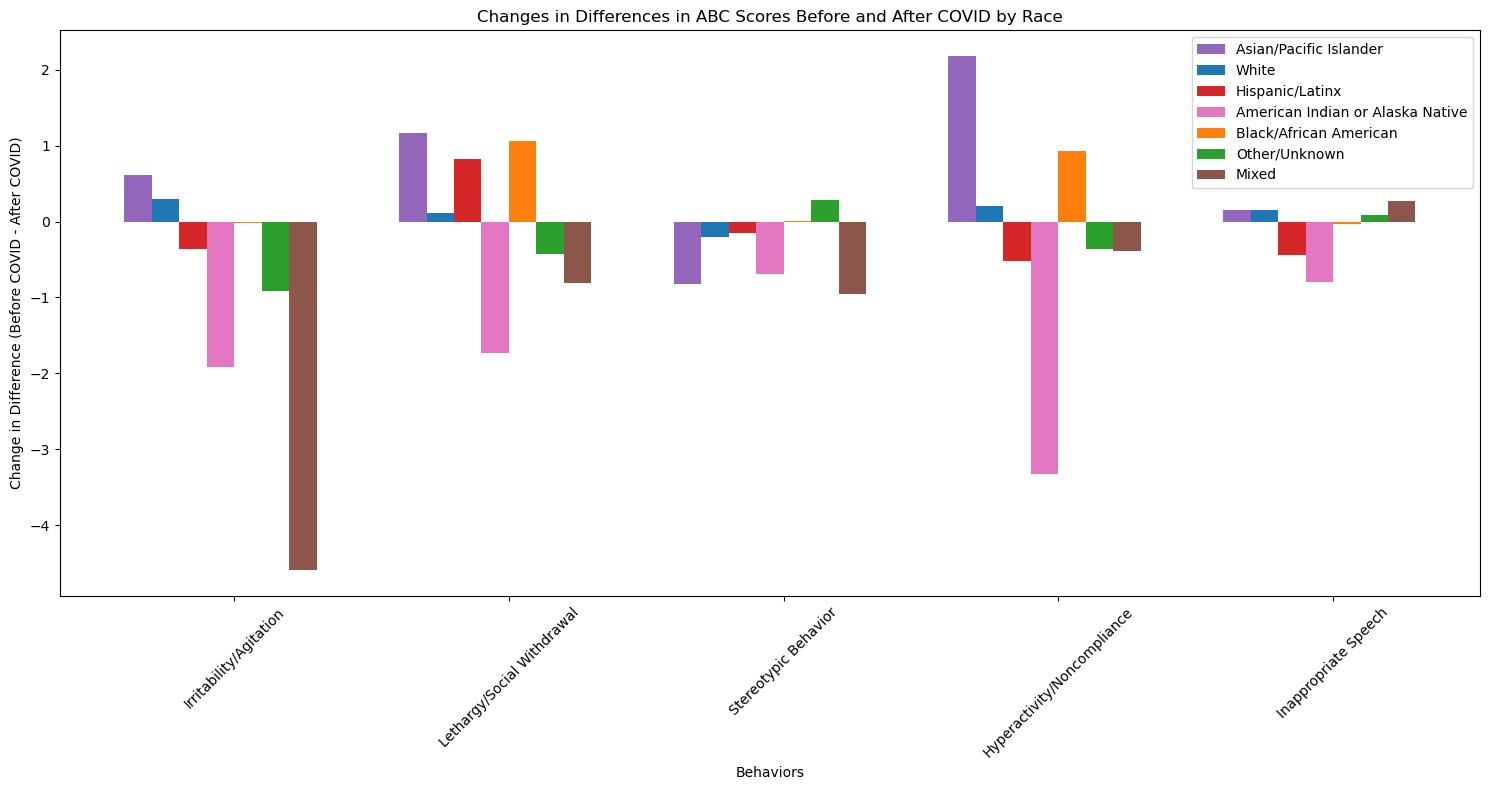

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '../data/Dartmouth Data Set- SIRS .xlsx'
xls = pd.ExcelFile(file_path)

# Load the relevant sheets
demographics_df = pd.read_excel(file_path, sheet_name='Demographics')
abc_data = pd.read_excel(file_path, sheet_name='ABC Data')

# Standardize ID column names
demographics_df.rename(columns={'Local ID': 'Client_ID'}, inplace=True)
abc_data.rename(columns={'Local ID': 'Client_ID'}, inplace=True)

# Merge dataframes on 'Client_ID'
merged_df = demographics_df.merge(abc_data, on='Client_ID', how='inner')

# Categorize race
def categorize_race(race):
    categories = {
        'White': ['White', 'Other: Middle Eastern'],
        'Black/African American': ['Black or African American'],
        'Other/Unknown': ['Unknown, not collected', 'Other', 'Unknown, not collected, White', 'Other: Biracial'],
        'Hispanic/Latinx': ['Other: Hispanic', 'Other: Latino', 'Other: hispanic', 'Other: Mexican'],
        'Asian/Pacific Islander': ['Asian', 'Native Hawaiian or Other Pacific Islander'],
        'Mixed': ['Black or African American, White', 'Asian, White'],
        'American Indian or Alaska Native': ['American Indian or Alaska Native'],
    }

    for category, labels in categories.items():
        if race in labels:
            return category
    return 'Other/Unknown'

# Apply the function to categorize race
merged_df['race_clean'] = merged_df['Race'].apply(categorize_race)

# Convert 'Date Reviewed' column to datetime, ignoring errors
merged_df['Date Reviewed'] = pd.to_datetime(merged_df['Date Reviewed'], errors='coerce')

# Drop rows with invalid or missing dates
merged_df = merged_df.dropna(subset=['Date Reviewed'])

# Define the COVID-19 onset date
covid_onset_date = pd.Timestamp('2020-03-13')

# Function to analyze differences by race
def analyze_by_race(race):
    race_data = merged_df[merged_df['race_clean'] == race]
    
    # Separate data into before and after COVID-19
    before_covid_data = race_data[race_data['Date Reviewed'] < covid_onset_date]
    after_covid_data = race_data[race_data['Date Reviewed'] >= covid_onset_date]

    # Further separate into Intake and Re-evaluation for both periods
    before_covid_intake = before_covid_data[before_covid_data['Type of Service'] == 'Intake']
    before_covid_reevaluation = before_covid_data[before_covid_data['Type of Service'] == 'Re-evaluation']

    after_covid_intake = after_covid_data[after_covid_data['Type of Service'] == 'Intake']
    after_covid_reevaluation = after_covid_data[after_covid_data['Type of Service'] == 'Re-evaluation']

    # Calculate the mean scores for each behavior at Intake and Re-evaluation for both periods
    before_covid_intake_means = before_covid_intake.mean(numeric_only=True)
    before_covid_reevaluation_means = before_covid_reevaluation.mean(numeric_only=True)

    after_covid_intake_means = after_covid_intake.mean(numeric_only=True)
    after_covid_reevaluation_means = after_covid_reevaluation.mean(numeric_only=True)

    # Combine the means into DataFrames for comparison
    before_covid_comparison = pd.DataFrame({
        'Intake Mean (Before COVID)': before_covid_intake_means,
        'Re-evaluation Mean (Before COVID)': before_covid_reevaluation_means
    })
    before_covid_comparison['Difference (Before COVID)'] = before_covid_comparison['Intake Mean (Before COVID)'] - before_covid_comparison['Re-evaluation Mean (Before COVID)']

    after_covid_comparison = pd.DataFrame({
        'Intake Mean (After COVID)': after_covid_intake_means,
        'Re-evaluation Mean (After COVID)': after_covid_reevaluation_means
    })
    after_covid_comparison['Difference (After COVID)'] = after_covid_comparison['Intake Mean (After COVID)'] - after_covid_comparison['Re-evaluation Mean (After COVID)']

    # Calculate the change in difference
    change_in_difference = before_covid_comparison['Difference (Before COVID)'] - after_covid_comparison['Difference (After COVID)']
    change_in_difference.name = 'Change in Difference'

    return change_in_difference

# List of races to analyze
races = merged_df['race_clean'].unique()
behaviors = ['Irritability/Agitation', 'Lethargy/Social Withdrawal', 'Stereotypic Behavior', 'Hyperactivity/Noncompliance', 'Inappropriate Speech']

# Define color mapping for races
colors = {
    'White': '#1f77b4',
    'Black/African American': '#ff7f0e',
    'Other/Unknown': '#2ca02c',
    'Hispanic/Latinx': '#d62728',
    'Asian/Pacific Islander': '#9467bd',
    'Mixed': '#8c564b',
    'American Indian or Alaska Native': '#e377c2',
}

# Plot changes in differences by race for each behavior
plt.figure(figsize=(15, 8))
bar_width = 0.1
index = range(len(behaviors))

for i, race in enumerate(races):
    change_in_difference = analyze_by_race(race)
    
    plt.bar([x + i * bar_width for x in index], change_in_difference, bar_width, color=colors[race], label=race)

# Add labels and title
plt.xlabel('Behaviors')
plt.ylabel('Change in Difference (Before COVID - After COVID)')
plt.title('Changes in Differences in ABC Scores Before and After COVID by Race')
plt.xticks([x + bar_width * len(races) / 2 for x in index], behaviors, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

TypeError: '<=' not supported between instances of 'int' and 'str'

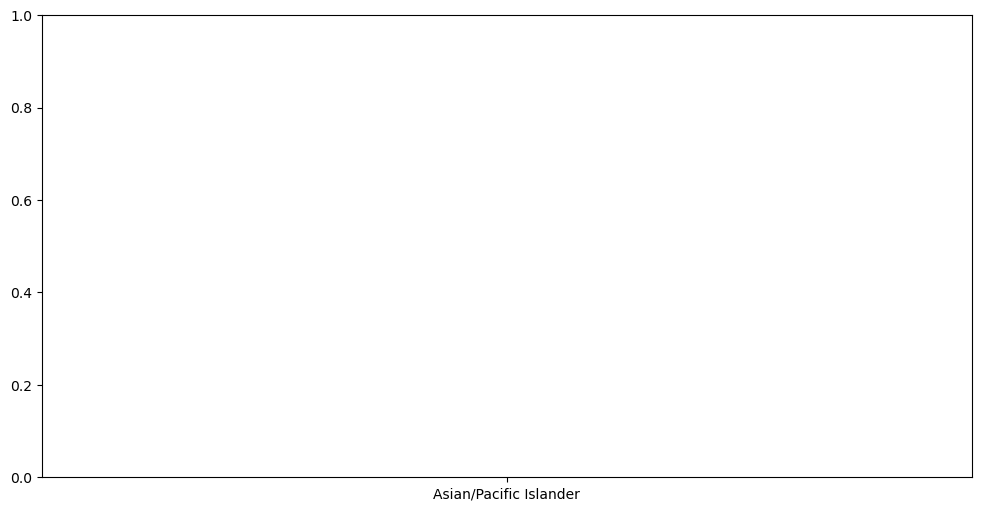

In [18]:
# Function to analyze differences by race and sum them
def analyze_and_sum_differences_by_race(race):
    race_data = merged_df[merged_df['race_clean'] == race]
    
    # Separate data into before and after COVID-19
    before_covid_data = race_data[race_data['Date Reviewed'] < covid_onset_date]
    after_covid_data = race_data[race_data['Date Reviewed'] >= covid_onset_date]

    # Further separate into Intake and Re-evaluation for both periods
    before_covid_intake = before_covid_data[before_covid_data['Type of Service'] == 'Intake']
    before_covid_reevaluation = before_covid_data[before_covid_data['Type of Service'] == 'Re-evaluation']

    after_covid_intake = after_covid_data[after_covid_data['Type of Service'] == 'Intake']
    after_covid_reevaluation = after_covid_data[after_covid_data['Type of Service'] == 'Re-evaluation']

    # Calculate the mean scores for each behavior at Intake and Re-evaluation for both periods
    before_covid_intake_means = before_covid_intake.mean(numeric_only=True)
    before_covid_reevaluation_means = before_covid_reevaluation.mean(numeric_only=True)

    after_covid_intake_means = after_covid_intake.mean(numeric_only=True)
    after_covid_reevaluation_means = after_covid_reevaluation.mean(numeric_only=True)

    # Combine the means into DataFrames for comparison
    before_covid_comparison = pd.DataFrame({
        'Intake Mean (Before COVID)': before_covid_intake_means,
        'Re-evaluation Mean (Before COVID)': before_covid_reevaluation_means
    })
    before_covid_comparison['Difference (Before COVID)'] = before_covid_comparison['Intake Mean (Before COVID)'] - before_covid_comparison['Re-evaluation Mean (Before COVID)']

    after_covid_comparison = pd.DataFrame({
        'Intake Mean (After COVID)': after_covid_intake_means,
        'Re-evaluation Mean (After COVID)': after_covid_reevaluation_means
    })
    after_covid_comparison['Difference (After COVID)'] = after_covid_comparison['Intake Mean (After COVID)'] - after_covid_comparison['Re-evaluation Mean (After COVID)']

    # Calculate the change in difference
    change_in_difference = before_covid_comparison['Difference (Before COVID)'] - after_covid_comparison['Difference (After COVID)']

    # Sum the changes in difference across all behaviors
    sum_change_in_difference = change_in_difference.sum()

    return sum_change_in_difference

# List of races to analyze
races = merged_df['race_clean'].unique()

# Calculate the sum of changes in differences for each race
sum_changes_by_race = {race: analyze_and_sum_differences_by_race(race) for race in races}

# Convert the result to a DataFrame for plotting
sum_changes_df = pd.DataFrame.from_dict(sum_changes_by_race, orient='index', columns=['Sum of Changes'])

# Plot the sums of changes in differences by race with colors
plt.figure(figsize=(12, 6))
plt.bar(sum_changes_df.index, sum_changes_df['Sum of Changes'], color=[colors[race] for race in sum_changes_df.index])

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Sum of Changes in Difference\n(Before COVID - After COVID)')
plt.title('Sum of Changes in Differences in ABC Scores Before and After COVID by Race')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

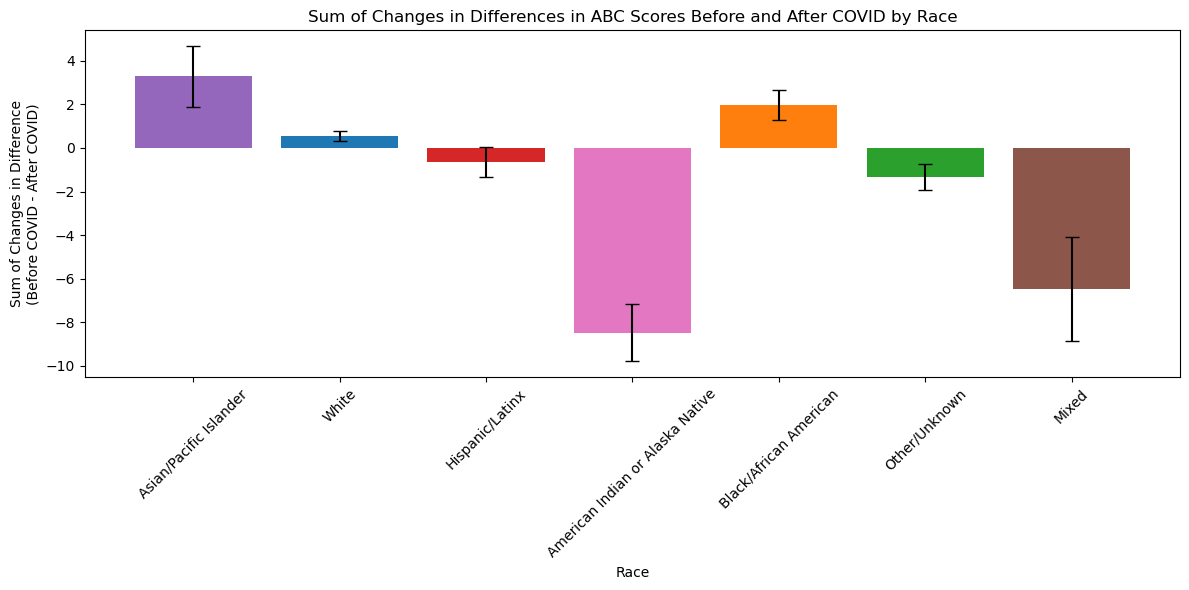

In [20]:
import numpy as np
from scipy import stats

# Function to analyze differences by race and calculate confidence intervals
def analyze_and_calculate_ci_by_race(race):
    race_data = merged_df[merged_df['race_clean'] == race]
    
    # Separate data into before and after COVID-19
    before_covid_data = race_data[race_data['Date Reviewed'] < covid_onset_date]
    after_covid_data = race_data[race_data['Date Reviewed'] >= covid_onset_date]

    # Further separate into Intake and Re-evaluation for both periods
    before_covid_intake = before_covid_data[before_covid_data['Type of Service'] == 'Intake']
    before_covid_reevaluation = before_covid_data[before_covid_data['Type of Service'] == 'Re-evaluation']

    after_covid_intake = after_covid_data[after_covid_data['Type of Service'] == 'Intake']
    after_covid_reevaluation = after_covid_data[after_covid_data['Type of Service'] == 'Re-evaluation']

    # Calculate the mean scores for each behavior at Intake and Re-evaluation for both periods
    before_covid_intake_means = before_covid_intake.mean(numeric_only=True)
    before_covid_reevaluation_means = before_covid_reevaluation.mean(numeric_only=True)

    after_covid_intake_means = after_covid_intake.mean(numeric_only=True)
    after_covid_reevaluation_means = after_covid_reevaluation.mean(numeric_only=True)

    # Combine the means into DataFrames for comparison
    before_covid_comparison = pd.DataFrame({
        'Intake Mean (Before COVID)': before_covid_intake_means,
        'Re-evaluation Mean (Before COVID)': before_covid_reevaluation_means
    })
    before_covid_comparison['Difference (Before COVID)'] = before_covid_comparison['Intake Mean (Before COVID)'] - before_covid_comparison['Re-evaluation Mean (Before COVID)']

    after_covid_comparison = pd.DataFrame({
        'Intake Mean (After COVID)': after_covid_intake_means,
        'Re-evaluation Mean (After COVID)': after_covid_reevaluation_means
    })
    after_covid_comparison['Difference (After COVID)'] = after_covid_comparison['Intake Mean (After COVID)'] - after_covid_comparison['Re-evaluation Mean (After COVID)']

    # Calculate the change in difference
    change_in_difference = before_covid_comparison['Difference (Before COVID)'] - after_covid_comparison['Difference (After COVID)']

    # Sum the changes in difference across all behaviors
    sum_change_in_difference = change_in_difference.sum()

    # Calculate the confidence interval
    n = len(change_in_difference)
    std_err = stats.sem(change_in_difference)
    h = std_err * stats.t.ppf((1 + 0.95) / 2, n - 1)

    return sum_change_in_difference, h

# Calculate the sum of changes in differences and confidence intervals for each race
sum_changes_ci_by_race = {race: analyze_and_calculate_ci_by_race(race) for race in races}

# Convert the result to a DataFrame for plotting
sum_changes_df = pd.DataFrame(sum_changes_ci_by_race, index=['Sum of Changes', 'CI']).T

# Plot the sums of changes in differences by race with specified colors and confidence intervals
plt.figure(figsize=(12, 6))
bars = plt.bar(sum_changes_df.index, sum_changes_df['Sum of Changes'], color=[colors[race] for race in sum_changes_df.index], yerr=sum_changes_df['CI'], capsize=5)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Sum of Changes in Difference\n(Before COVID - After COVID)')
plt.title('Sum of Changes in Differences in ABC Scores Before and After COVID by Race')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
